In [415]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [499]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
import pickle
from  sklearn.metrics import accuracy_score
from sklearn.tree  import DecisionTreeClassifier

In [468]:
pip install scikit-learn

  Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl (8.3 MB)
  Using cached scipy-1.10.1-cp311-cp311-win_amd64.whl (42.2 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Users\singh\OneDrive\Documents\Bootcamp\Problem Statement 4\bootcamp_case4\Scripts\python.exe -m pip install --upgrade pip


In [ ]:
df1=pd.read_csv("")

In [ ]:
path = "C://Users//Vanshi//Desktop//gfg"
dir_list = os.listdir(path)
 
print("Files and directories in '", path, "' :")
 
# prints all files
print(dir_list)

In [10]:

path = "C:\\Users\\singh\\OneDrive\\Documents\\Bootcamp\\Problem Statement 4\\Data\\Train Data"
for x in os.listdir(path):
    if x.endswith(".csv"):
        # Prints only text file present in My Folder
        folder_path=path+"\\"+x
        print(folder_path)
        

C:\Users\singh\OneDrive\Documents\Bootcamp\Problem Statement 4\Data\Train Data\Traindata_with_Target.csv
C:\Users\singh\OneDrive\Documents\Bootcamp\Problem Statement 4\Data\Train Data\Train_Claim.csv
C:\Users\singh\OneDrive\Documents\Bootcamp\Problem Statement 4\Data\Train Data\Train_Demographics.csv
C:\Users\singh\OneDrive\Documents\Bootcamp\Problem Statement 4\Data\Train Data\Train_Policy.csv
C:\Users\singh\OneDrive\Documents\Bootcamp\Problem Statement 4\Data\Train Data\Train_Vehicle.csv


In [209]:
df_claim=pd.read_csv("C:\\Users\\singh\\OneDrive\\Documents\\Bootcamp\\Problem Statement 4\\Data\\Train Data\\Train_Claim.csv")

In [210]:
df_demographics=pd.read_csv("C:\\Users\\singh\\OneDrive\\Documents\\Bootcamp\\Problem Statement 4\\Data\\Train Data\\Train_Demographics.csv")

In [211]:
df_policy=pd.read_csv("C:\\Users\\singh\\OneDrive\\Documents\\Bootcamp\\Problem Statement 4\\Data\\Train Data\\Train_Policy.csv")

In [212]:
df_vehicle=pd.read_csv("C:\\Users\\singh\\OneDrive\\Documents\\Bootcamp\\Problem Statement 4\\Data\\Train Data\\Train_Vehicle.csv")

In [213]:
df_target=pd.read_csv("C:\\Users\\singh\\OneDrive\\Documents\\Bootcamp\\Problem Statement 4\\Data\\Train Data\\Traindata_with_Target.csv")

In [214]:
df_claim

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,3,?,1,0,?,65501,13417,6071,46013
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,3,YES,2,1,YES,61382,15560,5919,39903
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,1,YES,2,3,NO,66755,11630,11630,43495
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,1,YES,2,3,NO,66243,12003,12003,42237
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,1,NO,2,1,YES,53544,8829,7234,37481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,Cust9993,2015-01-24,Vehicle Theft,?,Trivial Damage,Police,State9,City4,Location 1890,3,1,NO,0,3,?,6590,870,1078,4642
28832,Cust9994,2015-02-09,Single Vehicle Collision,Front Collision,Minor Damage,Fire,State8,City3,Location 2097,17,1,YES,0,2,YES,74547,14699,7875,51973
28833,Cust9996,2015-01-28,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State9,City7,Location 1452,1,1,YES,2,0,YES,55305,7043,7043,41219
28834,Cust9997,2015-01-28,Single Vehicle Collision,Rear Collision,Minor Damage,Ambulance,State9,City3,Location 1876,1,1,?,2,0,YES,55830,7059,7059,41712


In [215]:
df_policy

,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID
0,110122,328,2014-10-17,State3,250/500,1000,1406.91,0,husband,Cust1001
1,110125,256,1990-05-25,State1,250/500,2000,1415.74,6000000,unmarried,Cust1004
2,110126,228,2014-06-06,State1,500/1000,1000,1583.91,6000000,unmarried,Cust1005
3,110127,256,2006-10-12,State3,250/500,1000,1351.10,0,unmarried,Cust1006
4,110128,137,2000-06-04,State2,250/500,1000,1333.35,0,husband,Cust1007
...,...,...,...,...,...,...,...,...,...,...
28831,148614,425,1999-10-12,State3,250/500,1000,839.81,0,wife,Cust39493
28832,148615,367,1996-11-09,State3,250/500,1000,811.03,0,husband,Cust39494
28833,148616,208,1995-12-04,State3,250/500,1000,891.37,0,husband,Cust39495
28834,148618,401,1994-09-12,State3,250/500,856,911.37,0,own-child,Cust39497


In [216]:
df_demographics

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country
0,Cust10000,35,454776,MALE,JD,armed-forces,movies,56700,-48500,India
1,Cust10001,36,454776,MALE,JD,tech-support,cross-fit,70600,-48500,India
2,Cust10002,33,603260,MALE,JD,armed-forces,polo,66400,-63700,India
3,Cust10003,36,474848,MALE,JD,armed-forces,polo,47900,-73400,India
4,Cust10004,29,457942,FEMALE,High School,exec-managerial,dancing,0,-41500,India
...,...,...,...,...,...,...,...,...,...,...
28831,Cust9993,46,600561,MALE,Masters,protective-serv,sleeping,0,0,India
28832,Cust9994,44,439304,MALE,Masters,adm-clerical,dancing,0,-28800,India
28833,Cust9996,53,460722,MALE,PhD,transport-moving,base-jumping,63100,-43800,India
28834,Cust9997,53,472634,MALE,Associate,transport-moving,skydiving,67400,-43800,India


In [217]:
df_vehicle

,CustomerID,VehicleAttribute,VehicleAttributeDetails
0,Cust20179,VehicleID,Vehicle8898
1,Cust21384,VehicleModel,Malibu
2,Cust33335,VehicleMake,Toyota
3,Cust27118,VehicleModel,Neon
4,Cust13038,VehicleID,Vehicle30212
...,...,...,...
115339,Cust22134,VehicleMake,Audi
115340,Cust25338,VehicleID,Vehicle28831
115341,Cust7637,VehicleID,Vehicle12870
115342,Cust33581,VehicleID,Vehicle19680


In [218]:
df_vehicle=df_vehicle.pivot(index='CustomerID', columns='VehicleAttribute', values='VehicleAttributeDetails').reset_index()

In [219]:
df=df_claim.merge(df_demographics,on='CustomerID',how='left')

In [220]:
df=df.merge(df_policy,on='CustomerID',how='left')

In [221]:
df=df.merge(df_vehicle,on='CustomerID',how='left')

In [222]:
df

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleID,VehicleMake,VehicleModel,VehicleYOM
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,...,State1,100/300,1000,1632.73,0,not-in-family,Vehicle26917,Audi,A5,2008
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,...,State1,100/300,1000,1255.19,0,not-in-family,Vehicle15893,Audi,A5,2006
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,...,State3,500/1000,617,1373.38,0,wife,Vehicle5152,Volkswagen,Jetta,1999
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,...,State2,500/1000,722,1337.60,0,own-child,Vehicle37363,Volkswagen,Jetta,2003
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,...,State2,100/300,500,1353.73,4279863,unmarried,Vehicle28633,Toyota,CRV,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,Cust9993,2015-01-24,Vehicle Theft,?,Trivial Damage,Police,State9,City4,Location 1890,3,...,State1,500/1000,655,1276.01,0,unmarried,Vehicle13568,Suburu,Impreza,2007
28832,Cust9994,2015-02-09,Single Vehicle Collision,Front Collision,Minor Damage,Fire,State8,City3,Location 2097,17,...,State2,100/300,1089,1273.38,0,unmarried,Vehicle19810,Jeep,Wrangler,2003
28833,Cust9996,2015-01-28,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State9,City7,Location 1452,1,...,State3,250/500,787,1380.92,3448735,own-child,Vehicle3339,Suburu,Legacy,2004
28834,Cust9997,2015-01-28,Single Vehicle Collision,Rear Collision,Minor Damage,Ambulance,State9,City3,Location 1876,1,...,State3,250/500,780,1389.29,3364301,not-in-family,Vehicle10240,Suburu,Forrestor,2004


In [223]:
df=df.merge(df_target,on='CustomerID',how='left')

In [224]:
df_copy=df.copy()

In [556]:
df=df_copy.copy()

In [557]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerID                  28836 non-null  object 
 1   DateOfIncident              28836 non-null  object 
 2   TypeOfIncident              28836 non-null  object 
 3   TypeOfCollission            28836 non-null  object 
 4   SeverityOfIncident          28836 non-null  object 
 5   AuthoritiesContacted        26144 non-null  object 
 6   IncidentState               28836 non-null  object 
 7   IncidentCity                28836 non-null  object 
 8   IncidentAddress             28836 non-null  object 
 9   IncidentTime                28836 non-null  int64  
 10  NumberOfVehicles            28836 non-null  int64  
 11  PropertyDamage              28836 non-null  object 
 12  BodilyInjuries              28836 non-null  int64  
 13  Witnesses                   288

## Categorical Columns

In [549]:
#for col in df.columns:
#    if df[col].nunique() < 6 :
#        df[col]=df[col].astype('category')
#        print(df[col].value_counts())
#print(df.dtypes)

TypeOfIncident
Multi-vehicle Collision     11966
Single Vehicle Collision    11677
Vehicle Theft                2685
Parked Car                   2508
Name: count, dtype: int64
TypeOfCollission
Rear Collision     8561
Side Collision     7867
Front Collision    7246
?                  5162
Name: count, dtype: int64
SeverityOfIncident
Minor Damage      10400
Total Loss         8218
Major Damage       7671
Trivial Damage     2547
Name: count, dtype: int64
AuthoritiesContacted
Police       8324
Fire         6518
Ambulance    5732
Other        5570
Name: count, dtype: int64
NumberOfVehicles
1    16169
3     9711
2     2276
4      680
Name: count, dtype: int64
PropertyDamage
?      10459
NO      9687
YES     8690
Name: count, dtype: int64
BodilyInjuries
1    11072
0     9087
2     8677
Name: count, dtype: int64
Witnesses
2               8449
1               8345
0               6128
3               5868
MISSINGVALUE      46
Name: count, dtype: int64
PoliceReport
NO     9898
?      9805
YES  

In [560]:
df['PropertyDamage'].unique()

array(['Unknown', 'YES', 'NO'], dtype=object)

In [559]:
#damage_cat = np.array(
#     ['YES', 'NO', 'Unknown','?'])

#df['PropertyDamage'] = pd.Categorical(
#   df['PropertyDamage'], categories=damage_cat)
df.loc[df["PropertyDamage"] == "?", "PropertyDamage"] = 'Unknown'
#df["PropertyDamage"] = df["PropertyDamage"].cat.remove_categories("?")

In [561]:
##replacing missing vehicle make with the mode of related model 
for i in df.index:
    if df['VehicleMake'][i]=='???':
        model=df['VehicleModel'][i]
        
        make=df[df['VehicleModel']==model]['VehicleMake'].mode()
        
        df['VehicleMake'][i]=make[0]
        
    


C:\Users\singh\AppData\Local\Temp\ipykernel_19584\1221397774.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\singh\AppData\Local\Temp\ipykernel_19584\1221397774.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\singh\AppData\Local\Temp\ipykernel_19584\1221397774.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\singh\AppData\Local\Temp\ipykernel_19584\1221397774.py:8: SettingWithCopyWarning:


A value

C:\Users\singh\AppData\Local\Temp\ipykernel_19584\1221397774.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\singh\AppData\Local\Temp\ipykernel_19584\1221397774.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\singh\AppData\Local\Temp\ipykernel_19584\1221397774.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\singh\AppData\Local\Temp\ipykernel_19584\1221397774.py:8: SettingWithCopyWarning:


A value

In [563]:
## replacing missing value with 0
df.loc[df['Witnesses']=='MISSINGVALUE','Witnesses']='0'
#df["Witnesses"] = df["Witnesses"].cat.remove_categories("MISSINGVALUE")
df['Witnesses']=df['Witnesses'].astype('int64')

In [564]:
df['InsuredGender'].value_counts()


InsuredGender
FEMALE    15644
MALE      13162
Name: count, dtype: int64

In [605]:
df['InsuredGender']=df['InsuredGender'].fillna(df['InsuredGender'].mode())

<Axes: title={'center': 'InsuredGender vs Reported'}, xlabel='InsuredGender'>

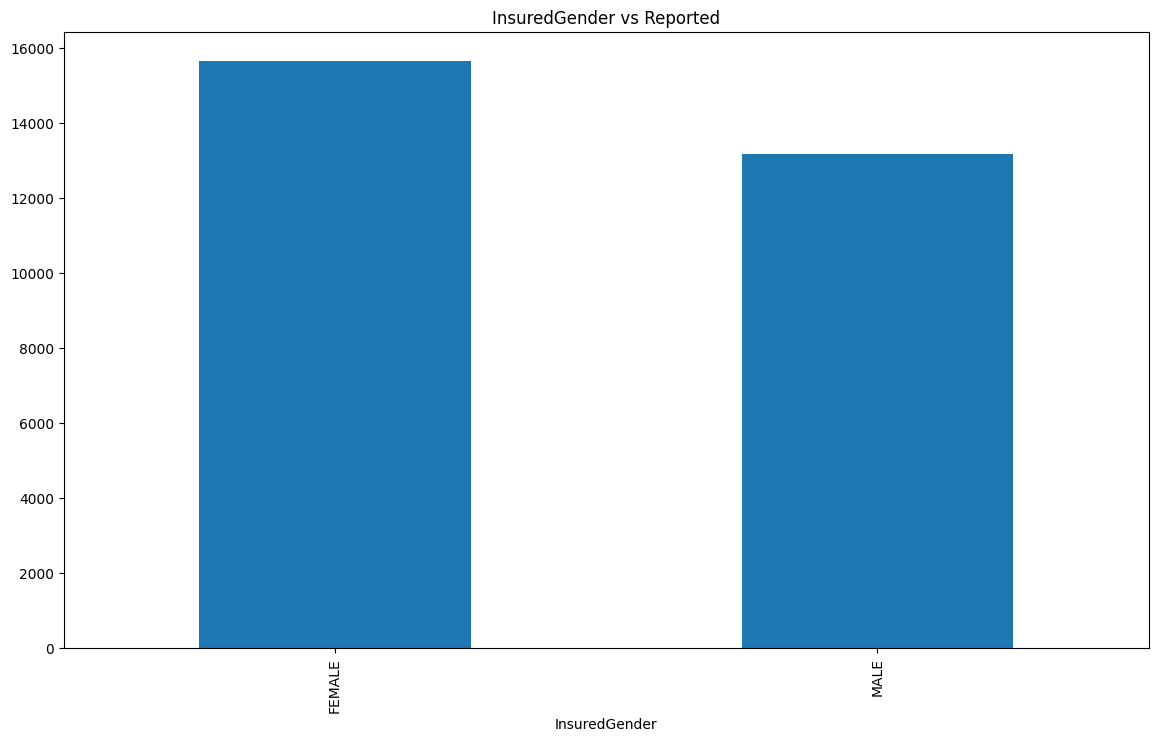

In [566]:
df.groupby(['InsuredGender'])['ReportedFraud'].count().plot.bar(title="InsuredGender vs Reported", figsize=(14,8))

In [568]:
#categories = np.array(
#     ['YES', 'NO', 'Unknown','?'])

#df['PoliceReport'] = pd.Categorical(
#   df['PoliceReport'], categories=categories)
df.loc[df["PoliceReport"] == "?", "PoliceReport"] = 'Unknown'
#df["PoliceReport"] = df["PoliceReport"].cat.remove_categories("?")

In [569]:
df['PoliceReport'] 

0        Unknown
1            YES
2             NO
3             NO
4            YES
          ...   
28831    Unknown
28832        YES
28833        YES
28834        YES
28835        YES
Name: PoliceReport, Length: 28836, dtype: object

<Axes: title={'center': 'PoliceReport vs Reported'}, xlabel='PoliceReport'>

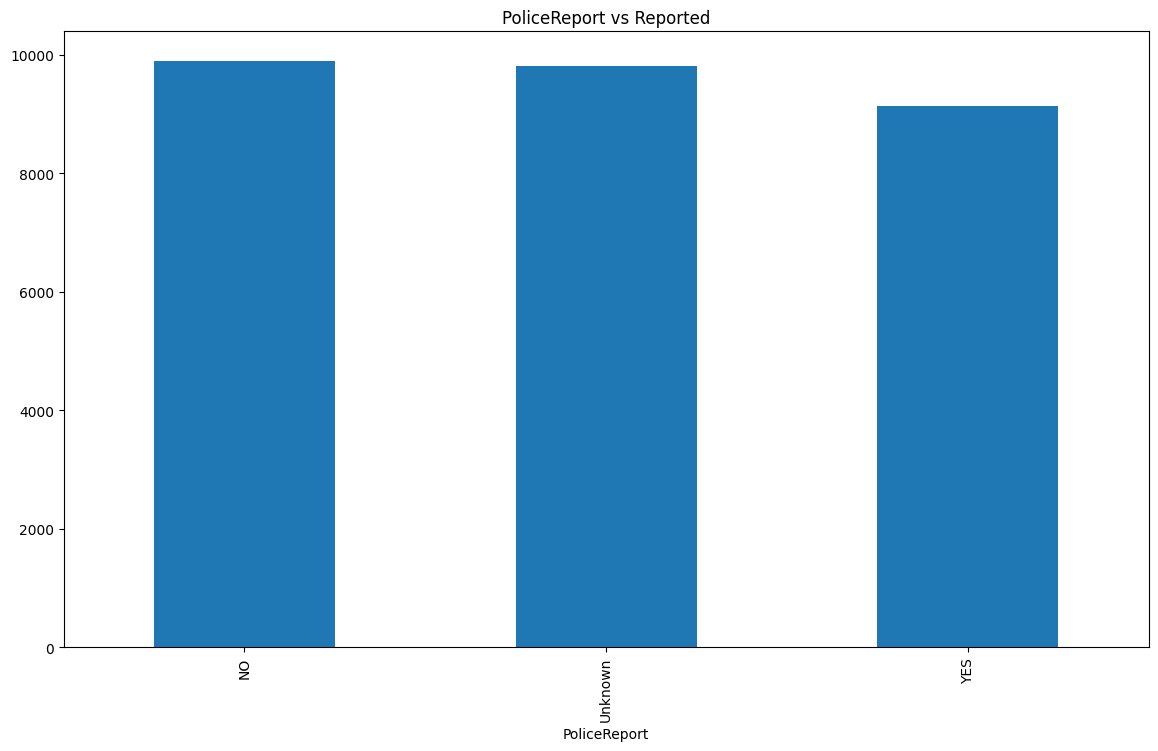

In [570]:
df.groupby(['PoliceReport'])['ReportedFraud'].count().plot.bar(title="PoliceReport vs Reported", figsize=(14,8))

<Axes: title={'center': 'TypeOfIncident vs ReportedFraud'}, xlabel='TypeOfIncident'>

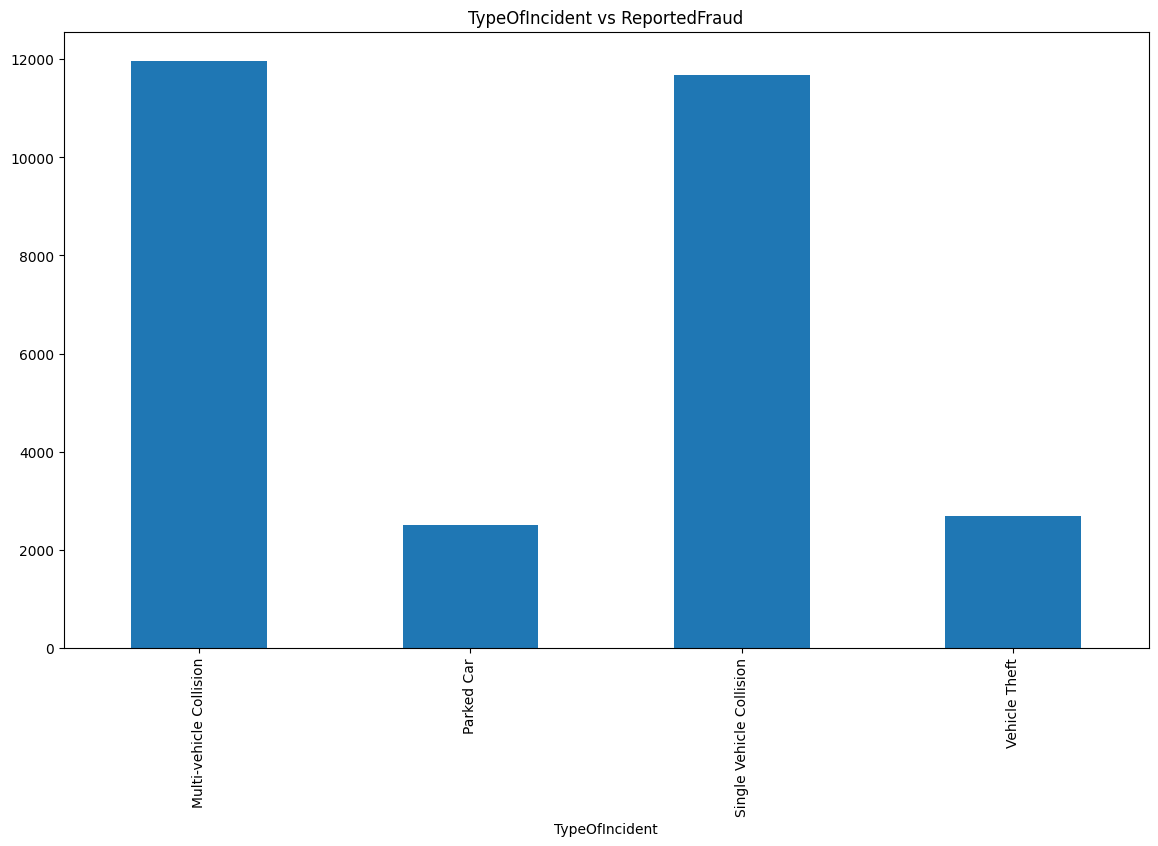

In [571]:
df.groupby(['TypeOfIncident'])['ReportedFraud'].count().plot.bar(title="TypeOfIncident vs ReportedFraud", figsize=(14,8))

In [572]:
#collission_type = np.array(
#     ['Rear Collision', 'Side Collision', 'Front Collision','Unknown','?'])

#df['TypeOfCollission'] = pd.Categorical(
#   df['TypeOfCollission'], categories=collission_type)
df.loc[df["TypeOfCollission"] == "?", "TypeOfCollission"] = 'Unknown'

#df["TypeOfCollission"] = df["TypeOfCollission"].cat.remove_categories("?")

<Axes: title={'center': 'TypeOfCollission vs ReportedFraud'}, xlabel='TypeOfCollission'>

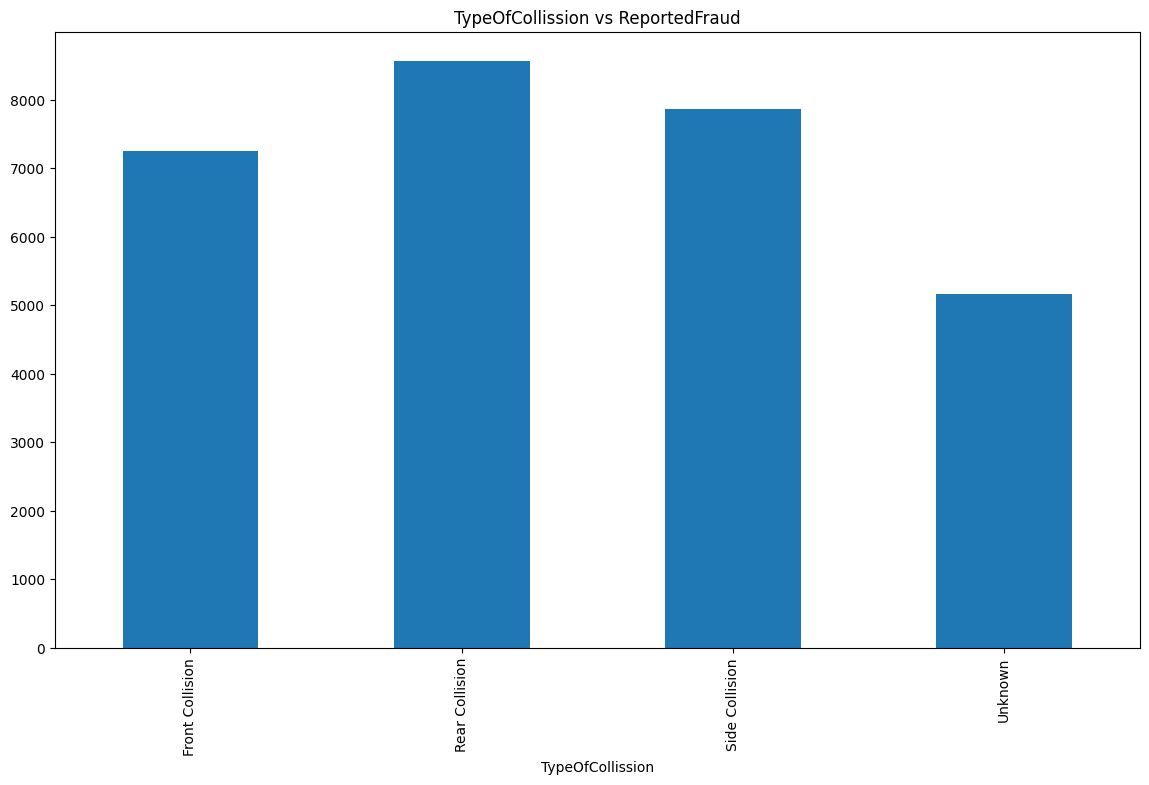

In [573]:
df.groupby(['TypeOfCollission'])['ReportedFraud'].count().plot.bar(title="TypeOfCollission vs ReportedFraud", figsize=(14,8))

<Axes: title={'center': 'SeverityOfIncident vs ReportedFraud'}, xlabel='SeverityOfIncident'>

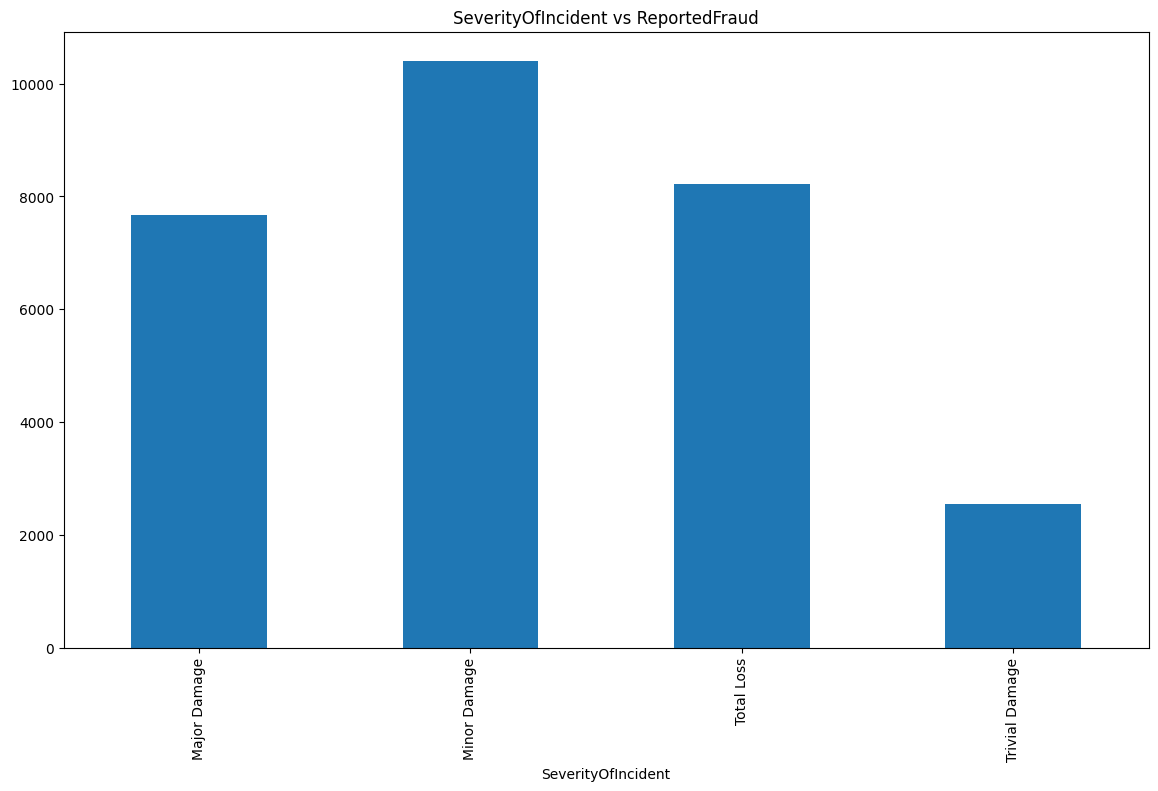

In [355]:
df.groupby(['SeverityOfIncident'])['ReportedFraud'].count().plot.bar(title="SeverityOfIncident vs ReportedFraud", figsize=(14,8))

## Numerical Columns

In [574]:
#df['AmountOfTotalClaim']=pd.to_numeric(df['AmountOfTotalClaim'], errors='coerce')
#df['AmountOfTotalClaim'].skew() 

In [575]:
#pd.to_numeric(df['AmountOfTotalClaim'], errors='coerce')

<Axes: >

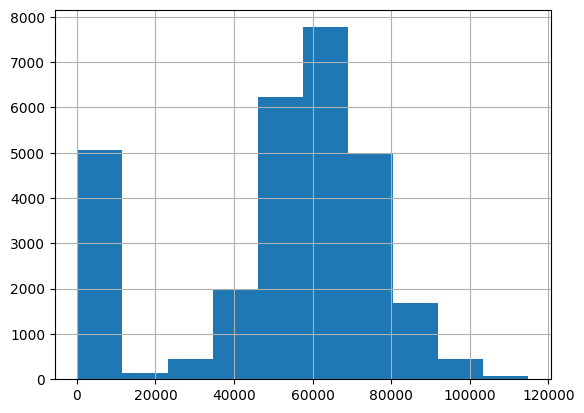

In [576]:
df[df['AmountOfTotalClaim']!='MISSEDDATA']['AmountOfTotalClaim'].astype('float64').hist()

In [577]:

## impute AmountOfTotalClaim value 

amt_median=df[df['AmountOfTotalClaim']!="MISSEDDATA"]['AmountOfTotalClaim'].median()
#df['AmountOfTotalClaim']=df['AmountOfTotalClaim'].fillna(df['AmountOfTotalClaim'].median())
df.loc[df["AmountOfTotalClaim"] == "MISSEDDATA", "AmountOfTotalClaim"] = amt_median
df['AmountOfTotalClaim']=df['AmountOfTotalClaim'].astype('float64')

In [578]:
##checking NAs
for col in df.columns:
    if df[col].dtype=='int64' or df[col].dtype=='float64':
        print(col)
        print(df[col].isna().any())

IncidentTime
False
NumberOfVehicles
False
BodilyInjuries
False
Witnesses
False
AmountOfTotalClaim
False
AmountOfInjuryClaim
False
AmountOfPropertyClaim
False
AmountOfVehicleDamage
False
InsuredAge
False
InsuredZipCode
False
CapitalGains
False
CapitalLoss
False
InsurancePolicyNumber
False
CustomerLoyaltyPeriod
False
Policy_Deductible
False
PolicyAnnualPremium
False
UmbrellaLimit
False


<Axes: >

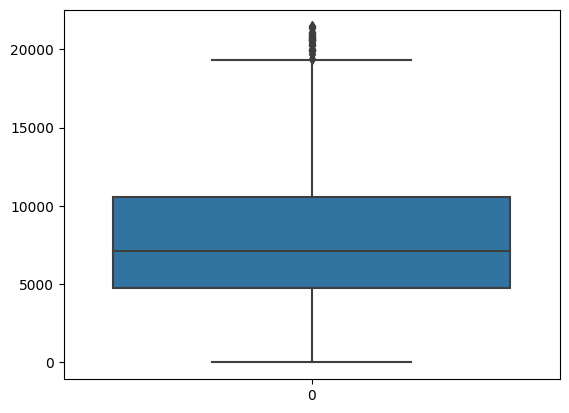

In [361]:

sns.boxplot(df['AmountOfInjuryClaim'])

In [362]:
df[df['AmountOfInjuryClaim']>2000]

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleID,VehicleMake,VehicleModel,VehicleYOM,ReportedFraud
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,...,100/300,1000,1632.73,0,not-in-family,Vehicle26917,Audi,A5,2008,N
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,...,100/300,1000,1255.19,0,not-in-family,Vehicle15893,Audi,A5,2006,N
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,...,500/1000,617,1373.38,0,wife,Vehicle5152,Volkswagen,Jetta,1999,N
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,...,500/1000,722,1337.60,0,own-child,Vehicle37363,Volkswagen,Jetta,2003,N
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,...,100/300,500,1353.73,4279863,unmarried,Vehicle28633,Toyota,CRV,2010,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28829,Cust9991,2015-02-19,Single Vehicle Collision,Rear Collision,Minor Damage,Other,State5,City2,Location 1658,8,...,100/300,986,1596.50,0,wife,Vehicle29216,BMW,Civic,1998,N
28832,Cust9994,2015-02-09,Single Vehicle Collision,Front Collision,Minor Damage,Fire,State8,City3,Location 2097,17,...,100/300,1089,1273.38,0,unmarried,Vehicle19810,Jeep,Wrangler,2003,N
28833,Cust9996,2015-01-28,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State9,City7,Location 1452,1,...,250/500,787,1380.92,3448735,own-child,Vehicle3339,Suburu,Legacy,2004,N
28834,Cust9997,2015-01-28,Single Vehicle Collision,Rear Collision,Minor Damage,Ambulance,State9,City3,Location 1876,1,...,250/500,780,1389.29,3364301,not-in-family,Vehicle10240,Suburu,Forrestor,2004,N


In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   CustomerID                  28836 non-null  object  
 1   DateOfIncident              28836 non-null  object  
 2   TypeOfIncident              28836 non-null  category
 3   TypeOfCollission            28836 non-null  category
 4   SeverityOfIncident          28836 non-null  category
 5   AuthoritiesContacted        26144 non-null  category
 6   IncidentState               28836 non-null  object  
 7   IncidentCity                28836 non-null  object  
 8   IncidentAddress             28836 non-null  object  
 9   IncidentTime                28836 non-null  int64   
 10  NumberOfVehicles            28836 non-null  category
 11  PropertyDamage              28836 non-null  category
 12  BodilyInjuries              28836 non-null  category
 13  Witnesses       

<Axes: >

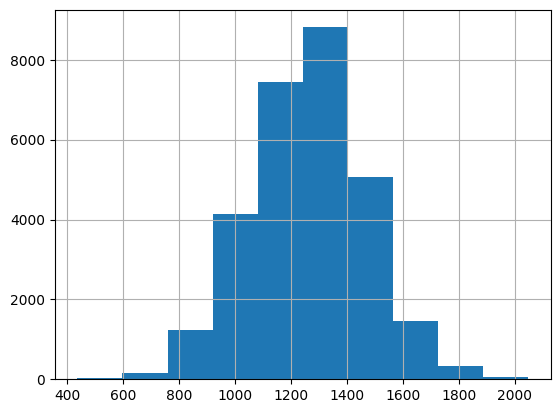

In [364]:
df[df['PolicyAnnualPremium']>=0]['PolicyAnnualPremium'].hist()

In [579]:
premium_amt_mean=df[df['PolicyAnnualPremium']>=0]['PolicyAnnualPremium'].mean()
#df[df['PolicyAnnualPremium']<0]['PolicyAnnualPremium']=premium_amt_mean
df.loc[df["PolicyAnnualPremium"] < 0, "PolicyAnnualPremium"]=premium_amt_mean

In [580]:
df[df['IncidentTime']<0]

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleID,VehicleMake,VehicleModel,VehicleYOM,ReportedFraud
1516,Cust11836,2015-02-21,Single Vehicle Collision,Front Collision,Major Damage,Police,State4,City6,Location 1809,-5,...,100/300,1000,974.33,0,other-relative,Vehicle21013,Audi,A5,2002,Y
4712,Cust15670,2015-02-20,Single Vehicle Collision,Front Collision,Total Loss,Fire,State5,City2,Location 1152,-5,...,500/1000,2000,1183.67,0,own-child,Vehicle5739,Dodge,Neon,2006,N
6547,Cust17956,2015-01-12,Single Vehicle Collision,Side Collision,Total Loss,Police,State3,City1,Location 2054,-5,...,100/500,2000,1406.09,5818194,unmarried,Vehicle8796,Chevrolet,Tahoe,2013,Y
7690,Cust19302,2015-02-20,Multi-vehicle Collision,Front Collision,Minor Damage,Other,State9,City2,Location 1998,-5,...,250/500,500,926.72,0,unmarried,Vehicle6683,Chevrolet,Tahoe,2009,N
9263,Cust21185,2015-01-12,Single Vehicle Collision,Rear Collision,Major Damage,Fire,State8,City5,Location 1947,-5,...,500/500,500,1456.95,0,wife,Vehicle17649,Accura,TL,2011,N
9398,Cust21349,2015-01-22,Single Vehicle Collision,Rear Collision,Total Loss,Fire,State5,City4,Location 1798,-5,...,100/300,2000,1424.15,0,other-relative,Vehicle33598,Mercedes,E400,2008,N
9445,Cust21406,2015-01-26,Single Vehicle Collision,Front Collision,Total Loss,Fire,State5,City1,Location 1655,-5,...,500/1000,2000,1230.06,0,not-in-family,Vehicle28126,Suburu,Impreza,2006,N
10108,Cust22197,2015-01-06,Multi-vehicle Collision,Rear Collision,Total Loss,Ambulance,State7,City2,Location 1143,-5,...,250/1000,1436,867.34,0,own-child,Vehicle22788,Audi,A3,2006,Y
10638,Cust2282,2015-02-01,Single Vehicle Collision,Side Collision,Major Damage,Police,State8,City5,Location 1313,-5,...,250/500,756,1352.11,2564527,unmarried,Vehicle29865,Chevrolet,Silverado,1998,Y
11198,Cust23476,2015-02-10,Single Vehicle Collision,Rear Collision,Total Loss,Other,State5,City2,Location 1406,-5,...,500/1000,1000,1072.80,0,other-relative,Vehicle13533,Honda,CRV,2005,N


<Axes: >

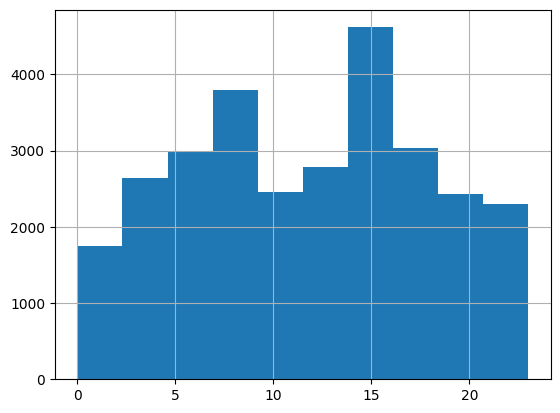

In [367]:
df[df['IncidentTime']>=0]['IncidentTime'].hist()

In [581]:
time_median=df[df['IncidentTime']>=0]['IncidentTime'].median()
df.loc[df["IncidentTime"] < 0, "IncidentTime"]=time_median

In [582]:
df.drop(['Country','CustomerID','VehicleID'],axis=1,inplace=True)

In [583]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DateOfIncident              28836 non-null  object 
 1   TypeOfIncident              28836 non-null  object 
 2   TypeOfCollission            28836 non-null  object 
 3   SeverityOfIncident          28836 non-null  object 
 4   AuthoritiesContacted        26144 non-null  object 
 5   IncidentState               28836 non-null  object 
 6   IncidentCity                28836 non-null  object 
 7   IncidentAddress             28836 non-null  object 
 8   IncidentTime                28836 non-null  int64  
 9   NumberOfVehicles            28836 non-null  int64  
 10  PropertyDamage              28836 non-null  object 
 11  BodilyInjuries              28836 non-null  int64  
 12  Witnesses                   28836 non-null  int64  
 13  PoliceReport                288

In [381]:
df[df['DateOfPolicyCoverage']=='2015-02-03']

,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,...,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleMake,VehicleModel,VehicleYOM,ReportedFraud
9448,2015-02-19,Multi-vehicle Collision,Front Collision,Total Loss,Ambulance,State5,City6,Location 1646,7,3,...,State3,250/500,561,1315.04,0,husband,Suburu,Forrestor,1998,N


In [447]:
#df['DateOfPolicyCoverage'].astype('date')
df['DateOfPolicyCoverage']=pd.to_datetime(df['DateOfPolicyCoverage'])
df['month_DateOfPolicyCoverage']=df['DateOfPolicyCoverage'].dt.month
df['year_DateOfPolicyCoverage']=df['DateOfPolicyCoverage'].dt.year
df['DateOfIncident']=pd.to_datetime(df['DateOfIncident'])
df['month_DateOfIncident']=df['DateOfIncident'].dt.month
df['year_DateOfIncident']=df['DateOfIncident'].dt.year

In [448]:
df['DateOfPolicyCoverage'].dt.month

0        10
1        11
2         2
3         4
4        10
         ..
28831     4
28832     9
28833     9
28834     8
28835     4
Name: DateOfPolicyCoverage, Length: 28836, dtype: int32

In [584]:
df['InsuredRelationship'].unique()

array(['not-in-family', 'wife', 'own-child', 'unmarried', 'husband',
       'other-relative'], dtype=object)

In [585]:
df['VehicleYOM']=df['VehicleYOM'].astype('int')

In [607]:
df_new=df.drop(['AmountOfTotalClaim','AmountOfPropertyClaim','InsuredAge','AmountOfInjuryClaim','DateOfPolicyCoverage','DateOfIncident','InsuredZipCode','IncidentState', 'IncidentCity',
       'IncidentAddress','InsuredHobbies','InsurancePolicyNumber'],axis=1)

In [450]:
cor=df_new.select_dtypes(include=['float64','int64','int32']).corr()

<Axes: >

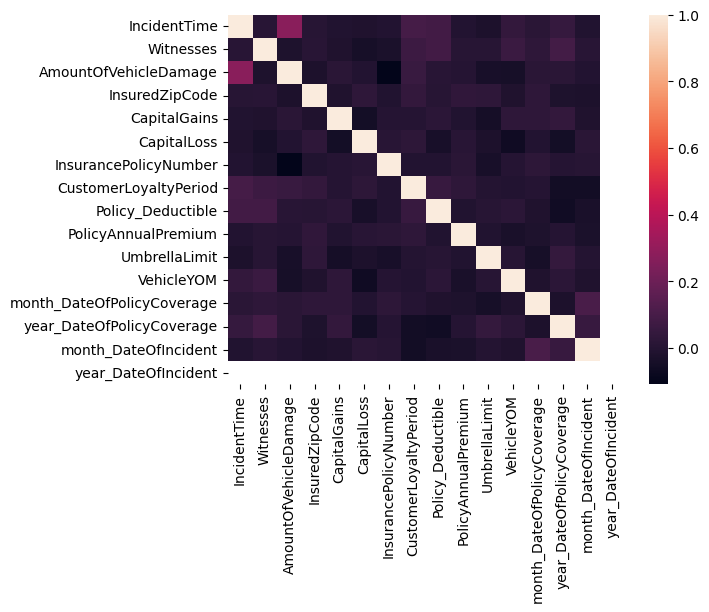

In [451]:
sns.heatmap(cor)

In [587]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DateOfIncident              28836 non-null  object 
 1   TypeOfIncident              28836 non-null  object 
 2   TypeOfCollission            28836 non-null  object 
 3   SeverityOfIncident          28836 non-null  object 
 4   AuthoritiesContacted        26144 non-null  object 
 5   IncidentState               28836 non-null  object 
 6   IncidentCity                28836 non-null  object 
 7   IncidentAddress             28836 non-null  object 
 8   IncidentTime                28836 non-null  int64  
 9   NumberOfVehicles            28836 non-null  int64  
 10  PropertyDamage              28836 non-null  object 
 11  BodilyInjuries              28836 non-null  int64  
 12  Witnesses                   28836 non-null  int64  
 13  PoliceReport                288

In [588]:
string_col=df_new.select_dtypes(include=['category','object']).columns

In [589]:
numeric_col=df_new.select_dtypes(include=['int32','int64','float64']).columns

In [477]:
string_col

Index(['TypeOfIncident', 'TypeOfCollission', 'SeverityOfIncident',
       'AuthoritiesContacted', 'NumberOfVehicles', 'PropertyDamage',
       'BodilyInjuries', 'PoliceReport', 'InsuredGender',
       'InsuredEducationLevel', 'InsuredOccupation', 'InsurancePolicyState',
       'Policy_CombinedSingleLimit', 'InsuredRelationship', 'VehicleMake',
       'VehicleModel', 'ReportedFraud'],
      dtype='object')

In [532]:
df_new

,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,...,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleMake,VehicleModel,VehicleYOM,ReportedFraud
0,Multi-vehicle Collision,Side Collision,Total Loss,Police,17,3,Unknown,1,0,Unknown,...,State1,100/300,1000,1632.73,0,not-in-family,Audi,A5,2008,N
1,Multi-vehicle Collision,Side Collision,Total Loss,Police,10,3,YES,2,1,YES,...,State1,100/300,1000,1255.19,0,not-in-family,Audi,A5,2006,N
2,Single Vehicle Collision,Side Collision,Minor Damage,Other,22,1,YES,2,3,NO,...,State3,500/1000,617,1373.38,0,wife,Volkswagen,Jetta,1999,N
3,Single Vehicle Collision,Side Collision,Minor Damage,Other,22,1,YES,2,3,NO,...,State2,500/1000,722,1337.60,0,own-child,Volkswagen,Jetta,2003,N
4,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,10,1,NO,2,1,YES,...,State2,100/300,500,1353.73,4279863,unmarried,Toyota,CRV,2010,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,Vehicle Theft,Unknown,Trivial Damage,Police,3,1,NO,0,3,Unknown,...,State1,500/1000,655,1276.01,0,unmarried,Suburu,Impreza,2007,N
28832,Single Vehicle Collision,Front Collision,Minor Damage,Fire,17,1,YES,0,2,YES,...,State2,100/300,1089,1273.38,0,unmarried,Jeep,Wrangler,2003,N
28833,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,1,1,YES,2,0,YES,...,State3,250/500,787,1380.92,3448735,own-child,Suburu,Legacy,2004,N
28834,Single Vehicle Collision,Rear Collision,Minor Damage,Ambulance,1,1,Unknown,2,0,YES,...,State3,250/500,780,1389.29,3364301,not-in-family,Suburu,Forrestor,2004,N


In [633]:
df_new['VehicleYOM'].unique()

array([2008, 2006, 1999, 2003, 2010, 2011, 2000, 1995, 2004, 2002, 2001,
       2005, 1997, 2015, 2012, 2007, 2014, 1998, 2009, 1996, 2013])

In [ ]:
df_new['AuthoritiesContacted']

In [481]:
numeric_col

Index(['IncidentTime', 'Witnesses', 'AmountOfVehicleDamage', 'CapitalGains',
       'CapitalLoss', 'CustomerLoyaltyPeriod', 'Policy_Deductible',
       'PolicyAnnualPremium', 'UmbrellaLimit', 'VehicleYOM',
       'month_DateOfPolicyCoverage', 'year_DateOfPolicyCoverage',
       'month_DateOfIncident', 'year_DateOfIncident'],
      dtype='object')

In [635]:
list(string_col)


['TypeOfIncident',
 'TypeOfCollission',
 'SeverityOfIncident',
 'AuthoritiesContacted',
 'PropertyDamage',
 'PoliceReport',
 'InsuredGender',
 'InsuredEducationLevel',
 'InsuredOccupation',
 'InsurancePolicyState',
 'Policy_CombinedSingleLimit',
 'InsuredRelationship',
 'VehicleMake',
 'VehicleModel',
 'ReportedFraud']

In [591]:



df_new['AuthoritiesContacted']=df_new['AuthoritiesContacted'].fillna('None')


In [479]:
for col in string_col:          
    label_encoder = preprocessing.LabelEncoder()
    
    df_new[col]=label_encoder.fit_transform(df_new[col])
    #df[col]=df[col].astype('category')
    #filename=col+".pkl"
    #pickle.dump(label_encoder, open(filename,'wb'))

<Axes: xlabel='AuthoritiesContacted'>

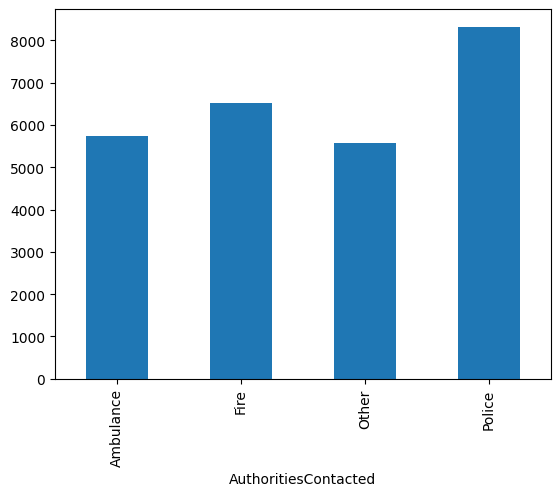

In [546]:
df.groupby(['AuthoritiesContacted'])['ReportedFraud'].count().plot.bar()

In [483]:
scaling_columns=[ 'AmountOfVehicleDamage', 'CapitalGains',
       'CapitalLoss', 'CustomerLoyaltyPeriod', 'Policy_Deductible',
       'PolicyAnnualPremium', 'UmbrellaLimit']

In [637]:
for col in scaling_columns:
    minmax = MinMaxScaler()
    df_new[col]=minmax.fit_transform(df_new[[col]])

In [487]:
## stratified sampling to maintain the ratio
X,Y=df_new.loc[:, ~df_new.columns.isin(['ReportedFraud'])],df_new.loc[:, df_new.columns.isin(['ReportedFraud'])]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33,stratify=Y, random_state=42)

In [488]:
Y['ReportedFraud'].value_counts(normalize=True)

ReportedFraud
0    0.730025
1    0.269975
Name: proportion, dtype: float64

In [489]:
logreg = LogisticRegression()

In [490]:
logreg.fit(X_train, Y_train)

C:\Users\singh\OneDrive\Documents\Bootcamp\Problem Statement 4\bootcamp_case4\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\singh\OneDrive\Documents\Bootcamp\Problem Statement 4\bootcamp_case4\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [491]:
y_pred = logreg.predict(X_test)

In [492]:
logreg.score(X_test, Y_test)

0.741067675493905

In [496]:
accuracy_score(Y_train, logreg.predict(X_train))


0.7452898550724638

In [500]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

y_pred = dtc.predict(X_test)

In [501]:
accuracy_score(Y_train, dtc.predict(X_train))

1.0

In [502]:
accuracy_score(Y_test, y_pred)


0.824926439680538

In [ ]:
test_claim=pd.read_csv("C:\\Users\\singh\\OneDrive\\Documents\\Bootcamp\\Problem Statement 4\\Data\\Test Data\\Test_Claim.csv")

test_demographics=pd.read_csv("C:\\Users\\singh\\OneDrive\\Documents\\Bootcamp\\Problem Statement 4\\Data\\Test Data\\Test_Demographics.csv")

test_policy=pd.read_csv("C:\\Users\\singh\\OneDrive\\Documents\\Bootcamp\\Problem Statement 4\\Data\\Test Data\\Test_Policy.csv")

test_vehicle=pd.read_csv("C:\\Users\\singh\\OneDrive\\Documents\\Bootcamp\\Problem Statement 4\\Data\\Test Data\\Test_Vehicle.csv")

test_target=pd.read_csv("C:\\Users\\singh\\OneDrive\\Documents\\Bootcamp\\Problem Statement 4\\Data\\Test Data\\Traindata_with_Target.csv")

In [503]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [504]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.843064182194617


In [505]:
dtc = grid_search.best_estimator_
#dtc.fit(X_train, Y_train)

y_pred = dtc.predict(X_test)

In [506]:
accuracy_score(Y_test, y_pred)


0.8536149642707019

In [507]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6947
           1       0.77      0.65      0.71      2569

    accuracy                           0.85      9516
   macro avg       0.83      0.79      0.80      9516
weighted avg       0.85      0.85      0.85      9516

